In [5]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = False

import warnings
warnings.filterwarnings("ignore")

from imshows import *

wavelength_c = 650e-9*u.m

0.0002178080140498601


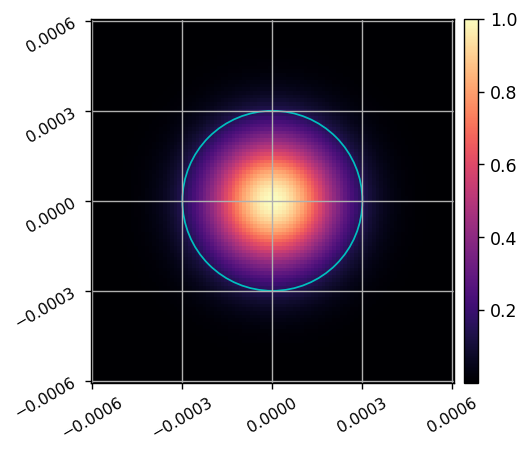

In [14]:
act_spacing = 300e-6*u.m

sampling = 25
ext_act = 4
ng = int(sampling*ext_act) + 1

pxscl = act_spacing/(sampling*u.pix)
ext = ext_act * act_spacing

xs = (np.linspace(-ng/2,ng/2-1,ng)+1/2)*pxscl.value
x,y = np.meshgrid(xs,xs)
r = np.sqrt(x**2 + y**2)

d = act_spacing.value/1.25
d = act_spacing.value/np.sqrt(-np.log(0.15))
print(d)
inf = np.exp(-(r/d)**2)
r15 = d*np.sqrt(-np.log(0.15)) 
fig,ax = imshow1(inf, pxscl=pxscl, patches=[Circle((0,0), r15, fill=False, color='c')], 
                       display_fig=False, return_fig=True)
ticks = np.linspace(-ext.value/2, ext.value/2, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid()
display(fig)

hdr = fits.Header()
hdr['SAMPLING'] = sampling
hdr.comments['SAMPLING'] = '# pixels per actuator'
hdr['NACTS'] = ext_act
hdr.comments['NACTS'] = '# actuators across grid'
inf_hdu = fits.PrimaryHDU(data=inf, header=hdr)
inf_hdu.writeto('inf.fits', overwrite=True)